In [1]:
import PyPDF2
import re

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.style.use("ggplot")

In [3]:
import glob
courtCasesNames = glob.glob("*.pdf")
print(courtCasesNames[:10], len(courtCasesNames))



['seriec_179_esp.pdf', 'seriec_182_esp.pdf', 'seriec_209_esp.pdf', 'seriec_293_esp.pdf', 'seriec_184_esp.pdf', 'CtIDH_Casos_Esp_2009.pdf', 'seriec_162_esp.pdf', 'seriec_048_esp.pdf', 'seriec_215_esp.pdf', 'seriec_056_esp.pdf'] 355


In [4]:
pdf = open(courtCasesNames[0],'rb') 
print(courtCasesNames[0])
pdfReader = PyPDF2.PdfFileReader(pdf)
print(pdfReader.numPages)
pageObj = pdfReader.getPage(9)
a = pageObj.extractText()
print([a])

seriec_179_esp.pdf


48
['     \n 10mostrado estar desactualizados.  En un \nproceso contencioso administrativo toda \nactuación debe contar con una constanc\nia procesal escrita y esto tiende a \nfavorecer el retardo en la administración\n de justicia.  Agregó que proteger la \npropiedad privada es una de las garant\nías que la Constitución Política ha \nestablecido para asegurar el derecho de\n los particulares. Por tanto, el único \nmotivo por el cual se puede expropiar es la utilidad pública o el interés social, \npero previo a una valoración justa y al \npago de una indemnización. Respecto al \njuicio expropiatorio establecido en el Có\ndigo de Procedimient\no Civil, indicó que \ndebería ser despachado y resu\nelto en treinta y ocho dí\nas.  No obstante, señaló \nque el triple de treinta y ocho días es \nel tiempo razonable en el que de acuerdo \ncon el ordenamiento jurídico\n, deberían resolverse los ju\nicios de expropiación. Por \notra parte, señaló que el ﬁrecargo al sola\nr no edificadoﬂ es una s

In [43]:
%%time 
bigfile = []
cashprizes = []
counter = 0
print(len(courtCasesNames))
for case in courtCasesNames[:]:
    counter += 1; print(counter)
    pdf = open(case,'rb')
    pdfReader = PyPDF2.PdfFileReader(pdf)
    for page in range(pdfReader.numPages):
        pageObj = pdfReader.getPage(page)
        pagetext = pageObj.extractText()
        cash = re.findall(r'\$(?<![\d.])\d{1,3}(?:[\,\.]\d{3})*.\d+', pagetext)
        cash2 = [float(re.sub("\D", "", number[:-2]) +"." + number[-2:])  if number[-3] in [",","."] else float(re.sub("\D", "", number)) for number in cash]
        cashprizes+= cash2
        if cash != []:bigfile += [case+" in page " +str(page)+ ":   "+ str(cash).strip('[]') ]
            
#print(np.array(bigfile))
#print(cashprizes)



        



355


CPU times: user 1h 25min 40s, sys: 8.5 s, total: 1h 25min 48s
Wall time: 1h 26min 11s


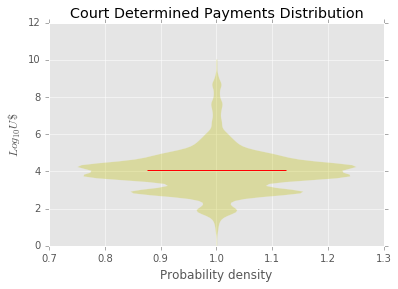

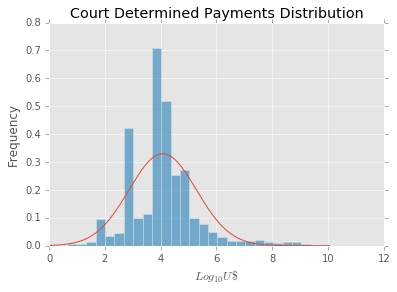

TypeError: Mismatch between array dtype ('<U856') and format specifier ('%.18e')

In [47]:
log_cash = [np.log10(x) for x in cashprizes]
plt.violinplot(log_cash, showmeans=True, showextrema=False)
plt.title("Court Determined Payments Distribution")
plt.ylabel("$Log_{10}U\$$")
plt.xlabel("Probability density")
plt.show()

from scipy.stats import norm
(mu, sigma) = norm.fit(log_cash)
lnspc = np.linspace(min(log_cash), max(log_cash), len(log_cash))
pdf_g = norm.pdf(lnspc, mu, sigma)
plt.plot(lnspc, pdf_g, label="Norm")

plt.hist(log_cash,bins = 30, normed = True, alpha = .65)
plt.title("Court Determined Payments Distribution")

plt.xlabel("$Log_{10}U\$$")
plt.ylabel("Frequency")
plt.show()

np.savetxt("court payments by case",np.array(bigfile))



In [53]:
print(np.array(bigfile))
thefile = open('court payments by case.txt', 'w')
for line in bigfile: 
    thefile.write( line + '\n')
    print(line)


["seriec_179_esp.pdf in page 28:   '$9.032.00', '$300.000,00', '$78.09'"
 "seriec_179_esp.pdf in page 29:   '$55.567.055,00', '$50.421.736'"
 "seriec_209_esp.pdf in page 96:   '$343,816.95'" ...,
 "CtIDH_Casos_Esp_1999.pdf in page 365:   '$22.802,12'"
 "CtIDH_Casos_Esp_1999.pdf in page 366:   '$10.000,00'"
 "CtIDH_Casos_Esp_1999.pdf in page 367:   '$151.000,00', '$30.000,00', '$15.000,00', '$16.000,00', '$10.000,00'"]
seriec_179_esp.pdf in page 28:   '$9.032.00', '$300.000,00', '$78.09'
seriec_179_esp.pdf in page 29:   '$55.567.055,00', '$50.421.736'
seriec_209_esp.pdf in page 96:   '$343,816.95'
seriec_209_esp.pdf in page 97:   '$65,640.98', '$12,000.00', '$17,400.00'
seriec_209_esp.pdf in page 98:   '$1,300.00', '$30,000.00'
seriec_209_esp.pdf in page 99:   '$80,000.00', '$40,000.00'
seriec_209_esp.pdf in page 100:   '$18,000', '$325,000', '$83,700'
seriec_209_esp.pdf in page 101:   '$2,910,686.99', '$25,000.00'
seriec_293_esp.pdf in page 115:   '$25.000'
seriec_293_esp.pdf in page 1